<a href="https://colab.research.google.com/github/AnkitAnand28/Fake-News-Detection-Using-LSTM/blob/main/Fake_News_Detection_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re

In [2]:
df_fake = pd.read_csv('/content/news/Fake.csv')
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
df_fake = df_fake.drop(['subject','date'],axis=1)
df_fake.head()

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


In [4]:
df_fake['label'] = 'FAKE'
df_fake.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,FAKE


In [5]:
df_fake.describe()

,title,text,label
count,23481,23481,23481
unique,17903,17455,1
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,FAKE
freq,6,626,23481


In [6]:
df_true = pd.read_csv("/content/news/True.csv")
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
df_true = df_true.drop(['subject','date'], axis=1)
df_true.head()

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...


In [8]:
df_true['label'] = 'TRUE'
df_true.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


In [9]:
df_true.describe()

,title,text,label
count,21417,21417,21417
unique,20826,21192,1
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,TRUE
freq,14,8,21417


In [10]:
df = pd.concat([df_true, df_fake], ignore_index=True)
df.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


In [11]:
df.shape

(44898, 3)

In [12]:
df.to_csv('fake_news.csv')

Model Building

In [13]:
!pip install tensorflow

In [14]:
import tensorflow as tf
from tensorflow import keras

In [15]:
import itertools
import seaborn as sns
import nltk, string
from string import punctuation
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense,Embedding,Input,LSTM,Bidirectional,GlobalMaxPool1D,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
df = pd.read_csv('/content/fake_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


In [17]:
df.shape

(44898, 4)

In [18]:
## Removing news source info from text
def extract_txt(text):
  regex = re.search(r"(?<=\(Reuters\)\s\-\s).*",text)
  if regex:
    return regex.group(0)
  return text
df['text_processed'] = df['text'].apply(extract_txt)

In [19]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df["label"] = df.label.apply(lambda x:0 if x=='TRUE' else 1)
df.head()

,title,text,label,text_processed
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,The head of a conservative Republican faction ...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,Transgender people will be allowed for the fir...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,The special counsel investigation of links bet...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,Trump campaign adviser George Papadopoulos tol...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,President Donald Trump called on the U.S. Post...


In [20]:
## Combining text_processed and title for creating full news article with headline
df['final_news'] = df['title']+" "+df['text_processed']
df.head()

,title,text,label,text_processed,final_news
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,The head of a conservative Republican faction ...,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,Transgender people will be allowed for the fir...,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,The special counsel investigation of links bet...,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,Trump campaign adviser George Papadopoulos tol...,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,President Donald Trump called on the U.S. Post...,Trump wants Postal Service to charge 'much mor...


In [21]:
df=df.drop(['title','text','text_processed'],axis=1)
df.head()

,label,final_news
0,0,"As U.S. budget fight looms, Republicans flip t..."
1,0,U.S. military to accept transgender recruits o...
2,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,0,FBI Russia probe helped by Australian diplomat...
4,0,Trump wants Postal Service to charge 'much mor...


In [22]:
## Creating list of possible stopwords from nltk library
stop = stopwords.words('english')

def cleanText(txt):
  #lowercasing
  txt = txt.lower()
  #removing stopwords
  txt = ' '.join([word for word in txt.split() if word not in (stop)])
  #removing non-alphabetic characters
  txt = re.sub('[^a-z]',' ',txt)
  return txt

In [23]:
# applying text cleaning function to clean final_news
df['final_news'] = df['final_news'].apply(cleanText)
df.head()

,label,final_news
0,0,u s budget fight looms republicans flip fisc...
1,0,u s military accept transgender recruits mond...
2,0,senior u s republican senator let mr muell...
3,0,fbi russia probe helped australian diplomat ti...
4,0,trump wants postal service charge much more ...


In [24]:
# Download the GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip

# Unzip the file
!unzip glove.6B.zip

--2024-10-25 11:06:20--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-10-25 11:06:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-10-25 11:06:21--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [25]:
EMBEDDING_FILE = 'glove.6B.50d.txt'

#configuration setting
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 32
EPOCHS = 10

In [26]:
y = df['label'].values
X = df.drop(['label'],axis=1)

In [27]:
y.shape

(44898,)

In [28]:
## Loading the pretrained word vectors
print('Loading word vectors...')
word2vec ={}
with open(EMBEDDING_FILE, 'r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors' %len(word2vec))

Loading word vectors...
Found 400000 word vectors


In [29]:
## Convert the sentences(strings) into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(list(X['final_news']))
X = tokenizer.texts_to_sequences(list(X['final_news']))

## Pad Sequences so that we get a N*T matrix
X = pad_sequences(X,maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensors:', X.shape)

Shape of data tensors: (44898, 100)


In [30]:
## get--> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.'%len(word2idx))

Found 115831 unique tokens.


In [31]:
## Preparing embedding matrix
print('Filling pre-trained embeddings...')
num_words=min(MAX_VOCAB_SIZE,len(word2idx)+1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i  in word2idx.items():
  if i<MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


In [32]:
## Load pre-trained word embeddings into an Embedding Layer
embedding_layer = Embedding(
    num_words,
    EMBEDDING_DIM,
    weights=[embedding_matrix],
    input_length=MAX_SEQUENCE_LENGTH,
    trainable=False
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
print('Building model...')

input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
x = Bidirectional(LSTM(15,return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1,activation="sigmoid")(x)

model = Model(input_,output)
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)
model.summary()

Building model...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 100, 50)             │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 100, 30)             │           7,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 30)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,007,951 (3.85 MB)

 Trainable params: 7,951 (31.06 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [35]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,stratify=y,random_state=0)

In [36]:
print('Training the model....')
r = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT
)

Training the model....
Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 84s 85ms/step - accuracy: 0.8365 - loss: 0.3696 - val_accuracy: 0.9408 - val_loss: 0.1500
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 73s 81ms/step - accuracy: 0.9470 - loss: 0.1395 - val_accuracy: 0.9531 - val_loss: 0.1187
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.9540 - loss: 0.1202 - val_accuracy: 0.9649 - val_loss: 0.0920
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 93s 89ms/step - accuracy: 0.9711 - loss: 0.0822 - val_accuracy: 0.9712 - val_loss: 0.0764
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 74s 83ms/step - accuracy: 0.9758 - loss: 0.0700 - val_accuracy: 0.9768 - val_loss: 0.0670
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 74s 82ms/step - accuracy: 0.9804 - loss: 0.0586 - val_accuracy: 0.9790 - val_loss: 0.0615
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 83s 84ms/step - accuracy: 0.9846 - loss: 0.0473 - val_accuracy: 0.9786 - val_loss: 0.0587
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0

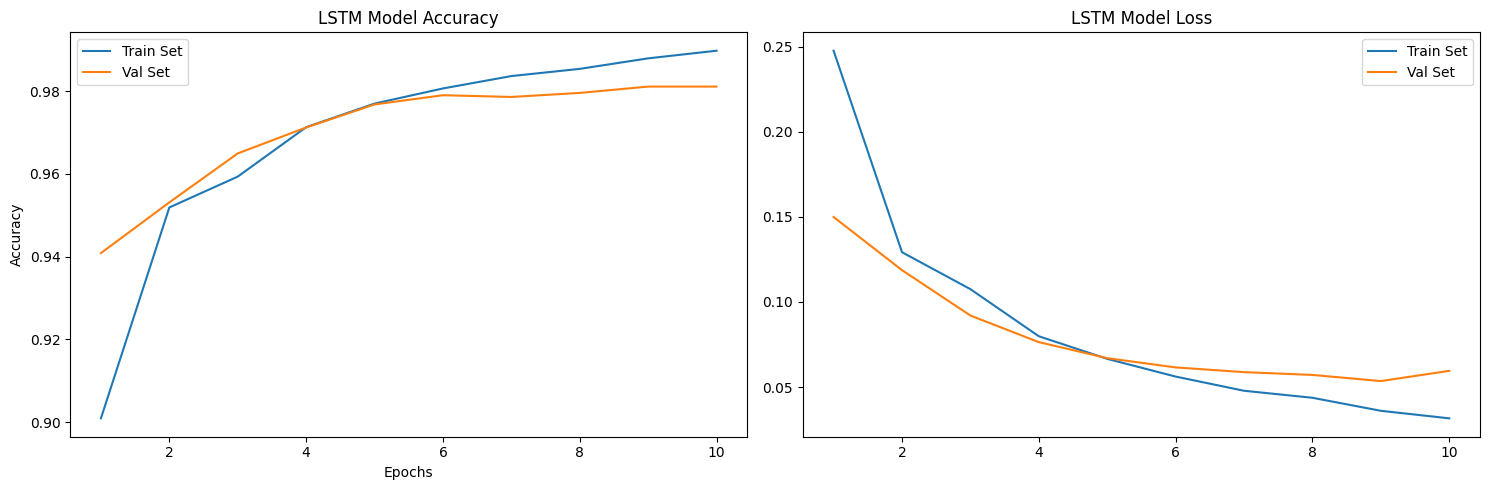

In [38]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']
loss = r.history['loss']
val_loss = r.history['val_loss']
epochs_range = range(1,len(r.epoch)+1)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Train Set')
plt.plot(epochs_range,val_acc,label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Train Set')
plt.plot(epochs_range,val_loss,label='Val Set')
plt.legend(loc="best")
plt.xlabel=('Epochs')
plt.ylabel=('Loss')
plt.title('LSTM Model Loss')

plt.tight_layout()
plt.show()

In [39]:
print("Accuracy of the model on Training data: ", model.evaluate(X_train,y_train)[1]*100)
print("Accuracy of the model on Testing data:",model.evaluate(X_test,y_test)[1]*100)

1123/1123 ━━━━━━━━━━━━━━━━━━━━ 34s 30ms/step - accuracy: 0.9908 - loss: 0.0309
Accuracy of the model on Training data:  98.88635277748108
281/281 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.9814 - loss: 0.0560
Accuracy of the model on Testing data: 98.16258549690247


In [40]:
pred = model.predict(X_test)
pred[:5]

281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


array([[0.9999949 ],
       [0.01189826],
       [0.99996245],
       [0.99943084],
       [0.9999914 ]], dtype=float32)

TypeError: 'str' object is not callable

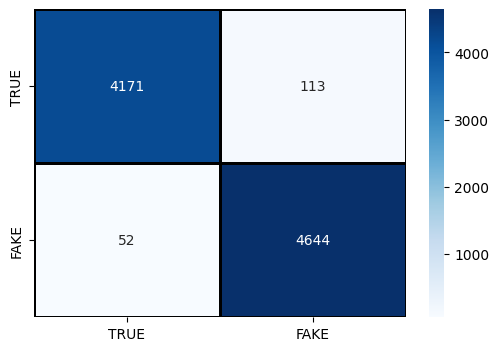

In [44]:
cm = confusion_matrix(y_test,pred.round())
cm = pd.DataFrame(cm,index=['TRUE','FAKE'], columns=['TRUE','FAKE'])
plt.figure(figsize=(6,4))
sns.heatmap(cm,cmap="Blues",linecolor='black',linewidth=1,annot=True,fmt='',
            xticklabels=['TRUE','FAKE'], yticklabels=['TRUE','FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [45]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4284
           1       0.98      0.99      0.98      4696

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

